# MENERAPKAN LOGIKA FUZZY MAMDANI UNTUK MENENTUKAN HARGA JUAL BATIK

**Suci Dwi Lestari (09011181722021)**

**SK 5 A**

Indonesia adalah negara yang amat sangat kaya akan keanekaragaman budaya dan banyak yang telah diakui UNESCO (United Nations Educational, Scientific and Cultural Organization). Salah satunya adalah batik yang ditetapkan sebagai Warisan Kemanusiaan untuk Budaya Lisan dan Nonbendawi (Masterpieces of the Oral and Intangible Heritage of Humanity) sejak 2 Oktober, 2009. Hal ini menjadikan batik sebagai lahan bisnis yang menjanjikan. Namun banyak orang atau pengrajin baru yang terjun kedunia bisnis ini tanpa mempelajarinya lebih dalam sehingga banyak pengusaha yang gulung tikar karena tidak mampu bersaing. Kendala utama mereka terdapat pada penetapan harga batiknya. Banyak batik yang memiliki harga tidak sesuai dengan kualitasnya dan tidak sesuai dengan harga pasar. Untuk mengatasi masalah tersebut dibutuhkan sebuah sistem yang dapat membantu menentukan harga jual batik dengan menggunakan metode Logika Fuzzy Mamdani. Hal ini memungkinkan sistem memberikan harga dengan perhitungan yang tepat dan diharapkan dengan adanya sistem ini akan memudahkan penjual atau pebisnis batik memberikan harga sesuai dengan harga pasar. Hasil dari penelitian ini adalah berupa prototype yang dapat mengolah inputan menjadi output yaitu harga jual batik.

Sumber Paper : http://publikasi.dinus.ac.id/index.php/technoc/article/view/544

**Mengimport library untuk fuzzy**

In [36]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from IPython.display import Image

**Terdapat 2 variabel input, yaitu :**

**Variabel Jenis Kain = Serat Kayu, Kain Katun, Kain Sutra (Variabel kain disini dipakai untuk menyatakan harga bahan baku kain sebelum diproses) dengan range :**
- Serat Kayu = Rp10.000 - Rp14.000
- Kain Katun = Rp12.000 - Rp19.000
- Kain Sutra = Rp16.000 - Rp23.000

**Variabel Proses = Print, Cap, Tulis (Variabel proses kriteria nya dibuat berdasarkan upah pengrajin batik itu sendiri) dengan range :**
- Print = Rp7.500  - Rp25.000
- Cap   = Rp15.000 - Rp35.000
- Tulis = Rp25.000 - Rp50.000

**Output dari kedua variabel ialah harga batik**

**Harga Batik :**
- Murah  = Rp65.000 - Rp84.000
- Sedang = Rp75.000 - Rp95.000
- Mahal  = Rp86.000 - Rp105.000

**Menentukan Variabel dan Semesta Pembicaraan**

Perlunya ditentukan variabel dan semesta pembicaraan karena setiap variabel yang akan digunakan oleh fuzzy memiliki nilai numerik, dan memiliki batas awal serta batas akhir (crisp).

In [3]:
jeniskain = ctrl.Antecedent(np.arange(10000, 22000, 1), 'Jenis Kain')
proses = ctrl.Antecedent(np.arange(7500, 49000, 1), 'Proses')
hargabatik = ctrl.Consequent(np.arange(65000, 104000, 1), 'Harga Batik')

# Plot Terpisah
jeniskain1 = np.arange(10000, 22000, 1)
proses1 = np.arange(7500, 49000, 1)
hargabatik1 = np.arange(65.000, 104000, 1)

Antecedent digunakan untuk premis atau sebagai input inputnya, dan consequent sebagai output atau hasil atau kesimpulannya.

# FUNGSI KEANGGOTAAN
Pada fuzzy terdapat fungsi keanggotaan yang dapat direpresentasikan ke dalam beberapa format, salah satunya ialah kurva segitiga dan kurva trapesium. Berikut adalah persamaan pada kurva segitiga dan kurva trapesium.

Gambar dari kurva segitiga adalah seperti dibawah ini

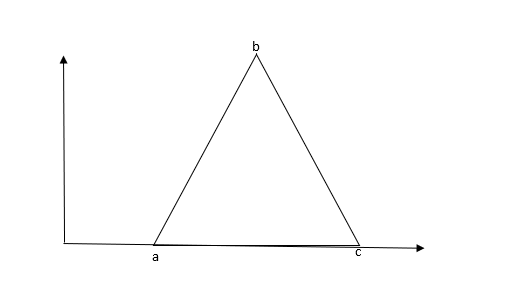

In [43]:
PATH = "Pictures/"
Image(filename = PATH + "Segitiga.png" )

Adapun persamaan dari gambar kurva segitiga diatas adalah

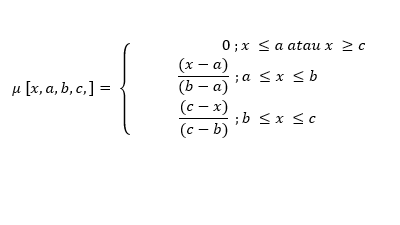

In [46]:
PATH = "Pictures/"
Image(filename = PATH + "Segitiga (2).png" )

Untuk kurva trapesium sendiri gambarnya adalah seperti dibawah ini

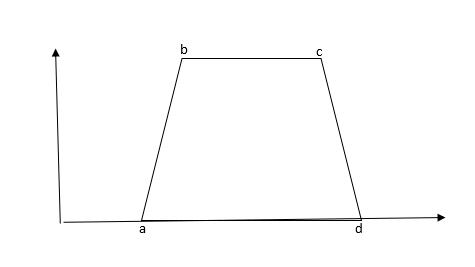

In [47]:
PATH = "Pictures/"
Image(filename = PATH + "Trapesium.png" )

Serta persamaan untuk kurva trapesium ialah

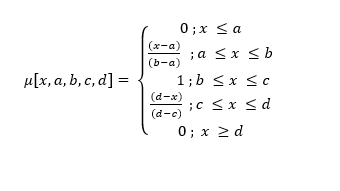

In [48]:
PATH = "Pictures/"
Image(filename = PATH + "Trapesium (2).png" )

Karena akan menggunakan kurva trapesium dan kurva segitiga, maka fungsi yang digunakan ialah fuzz.trapmf dan fuzz.trimf.

**Fungsi Keanggotaan Input Variabel Jenis Kain**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


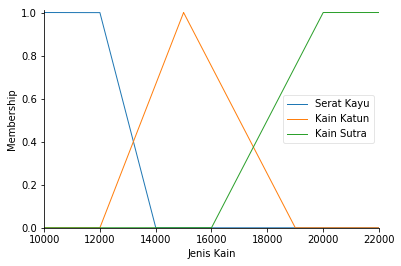

In [4]:
jeniskain['Serat Kayu'] = fuzz.trapmf(jeniskain.universe, [10000, 10000, 12000, 14000])
jeniskain['Kain Katun'] = fuzz.trimf(jeniskain.universe, [ 12000, 15000, 19000])
jeniskain['Kain Sutra'] = fuzz.trapmf(jeniskain.universe, [16000, 20000, 23000, 23000])
jeniskain.view()

**Fungsi Keanggotaan Input  Variabel Kain**


**Fungsi Keanggotaan Input Variabel Proses**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


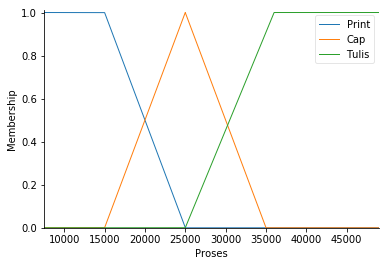

In [5]:
proses['Print'] = fuzz.trapmf(proses.universe, [7500, 7500, 15000, 25000])
proses['Cap']   = fuzz.trimf(proses.universe, [15000, 25000, 35000])
proses['Tulis'] = fuzz.trapmf(proses.universe, [25000, 36000, 50000, 50000])
proses.view() 

**Fungsi Keanggotaan Input Variabel Proses**

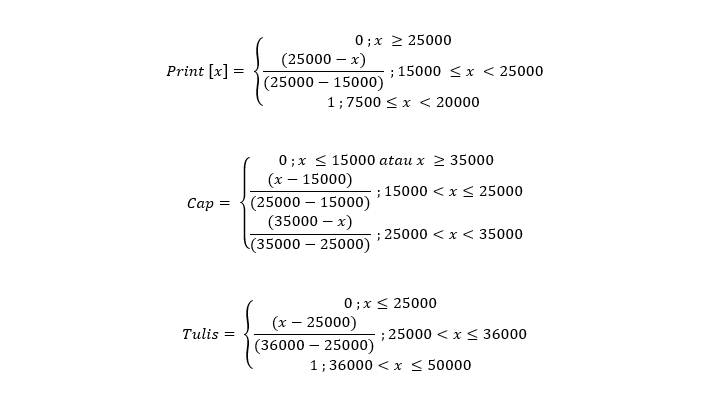

In [50]:
PATH = "Pictures/"
Image(filename = PATH + "Proses.png" )

**Fungsi Keanggotaan Output**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


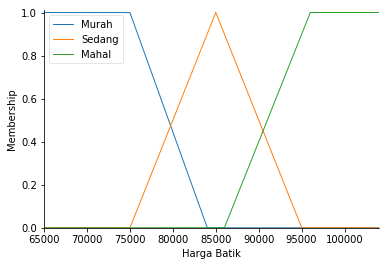

In [6]:
hargabatik['Murah'] = fuzz.trapmf(hargabatik.universe, [65000, 65000, 75000, 84000])
hargabatik['Sedang'] = fuzz.trimf(hargabatik.universe, [75000, 85000, 95000])
hargabatik['Mahal'] = fuzz.trapmf(hargabatik.universe, [86000, 96000, 105000, 105000])
hargabatik.view() 

**Fungsi Keanggotaan Output**

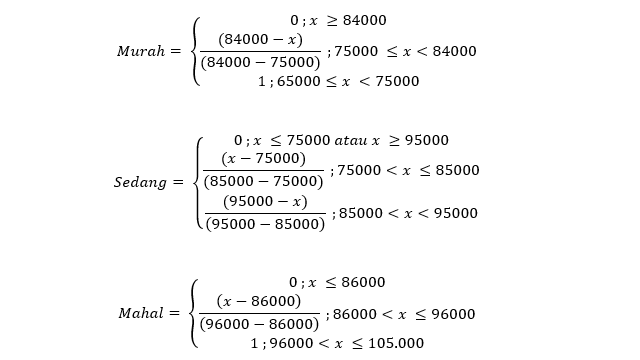

In [51]:
PATH = "Pictures/"
Image(filename = PATH + "2019-09-28 (3).png" )

# PENENTUAN RULE BASED

Tabel dari rule based seperti tabel dibawah ini

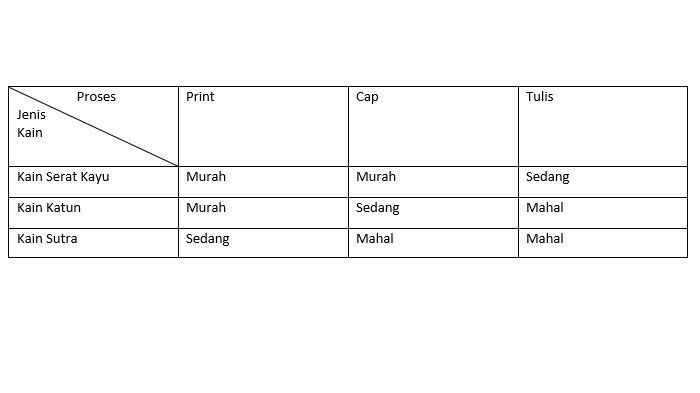

In [52]:
PATH = "Pictures/"
Image(filename = PATH + "Tabel.png" )

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17815cbfdd8>)

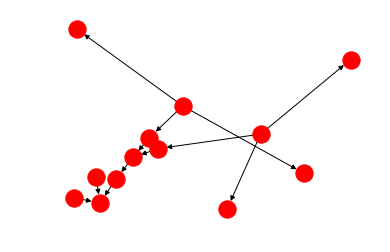

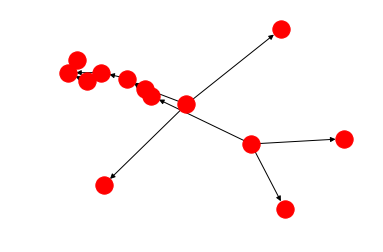

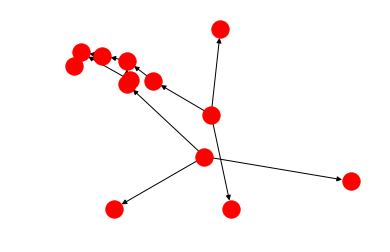

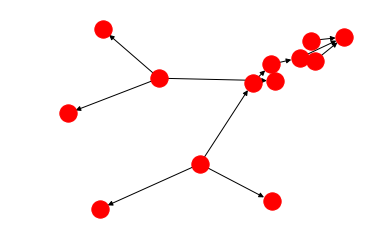

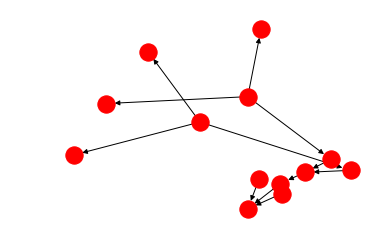

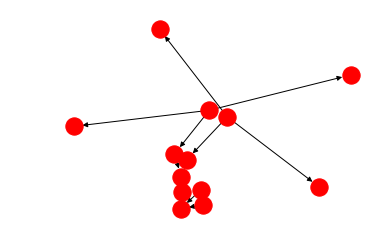

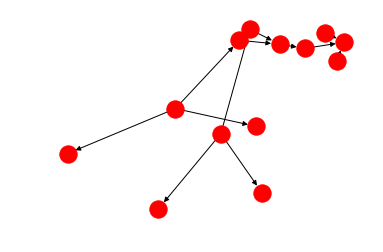

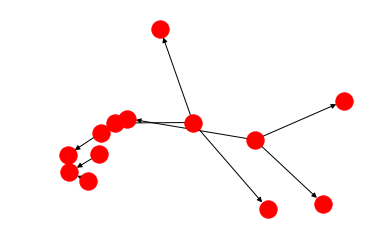

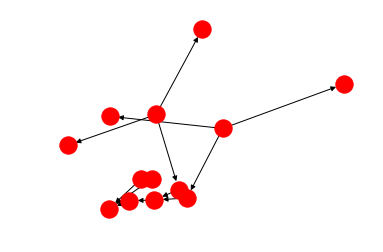

In [7]:
rule1 = ctrl.Rule(jeniskain['Serat Kayu'] & proses['Print'], hargabatik['Murah'])
rule2 = ctrl.Rule(jeniskain['Serat Kayu'] & proses['Cap'], hargabatik['Murah'])
rule3 = ctrl.Rule(jeniskain['Serat Kayu'] & proses['Tulis'], hargabatik['Sedang'])
rule4 = ctrl.Rule(jeniskain['Kain Katun'] & proses['Print'], hargabatik['Murah'])
rule5 = ctrl.Rule(jeniskain['Kain Katun'] & proses['Cap'], hargabatik['Sedang'])
rule6 = ctrl.Rule(jeniskain['Kain Katun'] & proses['Tulis'], hargabatik['Mahal'])
rule7 = ctrl.Rule(jeniskain['Kain Sutra'] & proses['Print'], hargabatik['Sedang'])
rule8 = ctrl.Rule(jeniskain['Kain Sutra'] & proses['Cap'], hargabatik['Mahal'])
rule9 = ctrl.Rule(jeniskain['Kain Sutra'] & proses['Tulis'], hargabatik['Mahal'])

rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

**Menggabungkan semua rule untuk dijadikan sebagai control system**

In [8]:
simulasi_harga_batik = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

**Menggunakan mode simulasi**

In [9]:
harga_batik = ctrl.ControlSystemSimulation(simulasi_harga_batik)

# MEKANISME INFERENSI

In [10]:
harga_batik.input['Jenis Kain'] = 10000
harga_batik.input['Proses'] = 20000

Kita akan melakukan perhitungan manual. Contohnya, input untuk variabel Jenis Kain bernilai 10000, dan input untuk variabel Proses nilainya 20000. Dilihat dari himpunan fuzzy, nilai 10000 berada pada himpunan fuzzy 'Kain Serat Kayu', dan untuk nilai proses 20000 berada pada himpunan 'Print' dan 'Cap'. Berikut perhitungan manualnya :

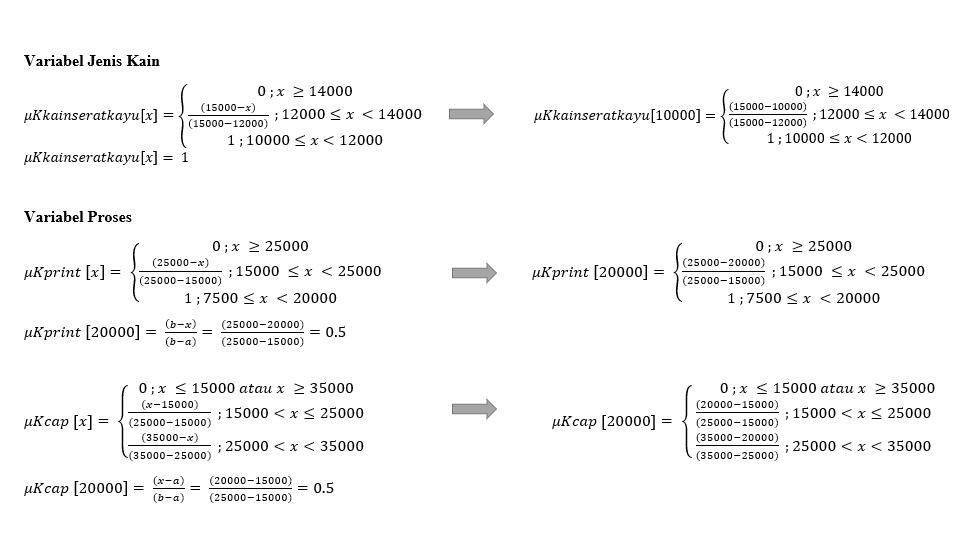

In [53]:
PATH = "Pictures/"
Image(filename = PATH + "2019-09-28 (15) Keanggotaan .png" )

**Evaluasi Rule**

Langkah selanjutnya, mencari fungsi implikasi dan defuzzyfikasi. Pada fuzzy metode mamdani, fungsi yang digunakan adalah MIN atau menggunakan nilai minimum. Dari rule based yang telah tersedia, maka 4 rule yang digunakan, yaitu :

**Implikasi**
1. Jika menggunakan Kain Serat Kayu (1) dan proses pembuatan dikerjakan dengan teknik Print (0.5), maka harga Murah (0.5)
2. Jika menggunakan Kain Serat Kayu (1) dan proses pembuatan dikerjakan dengan teknik Cap (0.5), maka harga Murah (0.5)

**Aggregate**

**Menghitung nilai Luas dan x**
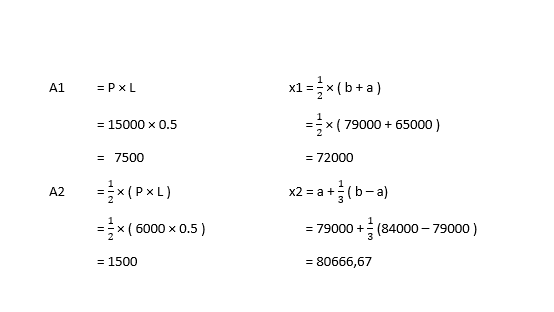

**Defuzzyfikasi**

**Manual**
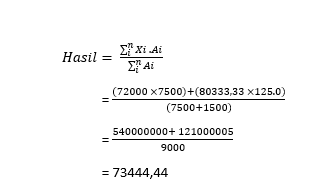

In [11]:
prediksi_akhir = harga_batik.compute()
prediksi_akhir = harga_batik.output['Harga Batik']
print ("Perhitungan hasil komputasi = %.2f" % prediksi_akhir)

Perhitungan hasil komputasi = 73425.37


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


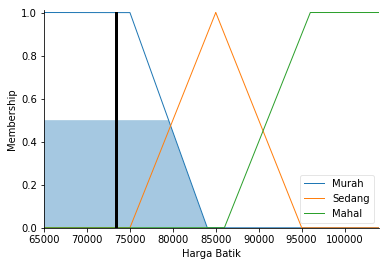

In [12]:
hargabatik.view(sim = harga_batik)

In [13]:
hasil = 73444.44
akurasi = prediksi_akhir*100/hasil
error = 100-akurasi
print ("Akurasi = %.3f" % akurasi + " %")
print ("Error = %.3f" % error  + " %")

Akurasi = 99.974 %
Error = 0.026 %


**Analisa**
 : Dari hasil perhitungan manual dan perhitungan otomatis menggunakan python mendapatkan selisih sebesar 99.974%. Hal ini dikarenakan perhitungan manual dilakukan dengan mengarsir bagian-bagian pada grafik sehingga menyebabkan perbedaan pada perhitungannya.

In [22]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/sucidl/sdl/blob/master/2019-10-03%20(3).png?raw=true")